In [2]:
import sklearn, pandas

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [84]:
sales = pandas.read_csv("c:/Users/thangnd/Desktop/home_data.csv")

In [85]:
sales.shape

(21613, 21)

In [88]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

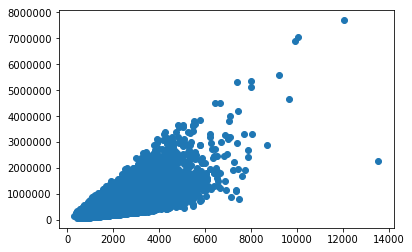

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=sales["sqft_living"],y=sales["price"])

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [90]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(sales,train_size=0.8,test_size=0.2, random_state=0)

#x,y: là dataframe sales

## Build the regression model using only sqft_living as a feature

In [91]:
train_data.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5268,5100402668,20150218T000000,495000,3,1.0,1570,5510,1.0,0,0,...,7,1070,500,1940,0,98115,47.6942,-122.319,1770,6380
16909,7856560480,20140808T000000,635000,3,2.5,1780,11000,1.0,0,0,...,8,1210,570,1980,0,98006,47.5574,-122.149,2310,9700


In [127]:
train_data['price'].head()

5268     495000
16909    635000
16123    382500
12181    382500
12617    670000
Name: price, dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np
sqft_model = LinearRegression()
sqft_model.fit(np.reshape(train_data["sqft_living"].values, [-1, 1]),train_data["price"])

#x_train: sqft_living, y_train: price

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Evaluate the simple model

In [93]:
print(test_data['price'].mean())

529242.610687


#### Mean Square Error(MSE)

In [94]:
print(mean_squared_error(test_data['price'], sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))))

61940787221.49824


#### Root Mean Square Error(RMSE)

In [130]:
# Du bao price(y) dua vao x (test_data['sqft_living'])
prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
labels = test_data['price']

print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

248879.06143647005


RMSE of about \$248,879\$!

In [129]:
prediction

array([ 357817.97358056, 1277876.09945262,  360657.65915424, ...,
        337940.17456481,  221513.06604396,  417451.37062783])

# Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

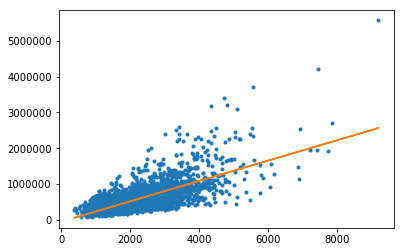

In [97]:
plt.plot(test_data['sqft_living'],
         test_data['price'],'.',
         test_data['sqft_living'],
         sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1])),
         '-')


Above:  blue dots are original data, orange line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [132]:
#Do chỉ có 01 biến x là sqft_living (X) chỉ có 01 coefficients
sqft_model.coef_

array([283.96855737])

Below: we can view the learned regression intercept.

In [99]:
sqft_model.intercept_

-48257.06345556176

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [100]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

#### To build a more elaborate model advance features

In [148]:
advanced_features =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade','waterfront','view','sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [124]:
sales[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


In [150]:
sales[advanced_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,98178,3,7,0,0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,98125,3,7,0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,98028,3,6,0,0,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,98136,5,7,0,0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,98074,3,8,0,0,1680,0,1987,0,47.6168,-122.045,1800,7503


#### Question 1. With zip code and the highest average home price we found. Choose the average house price of that zip code?(Selection and summary statistics)
Đáp án nhìn vào biểu đồ boxplot có thể thấy với zip code = 98039 thì price cao nhất

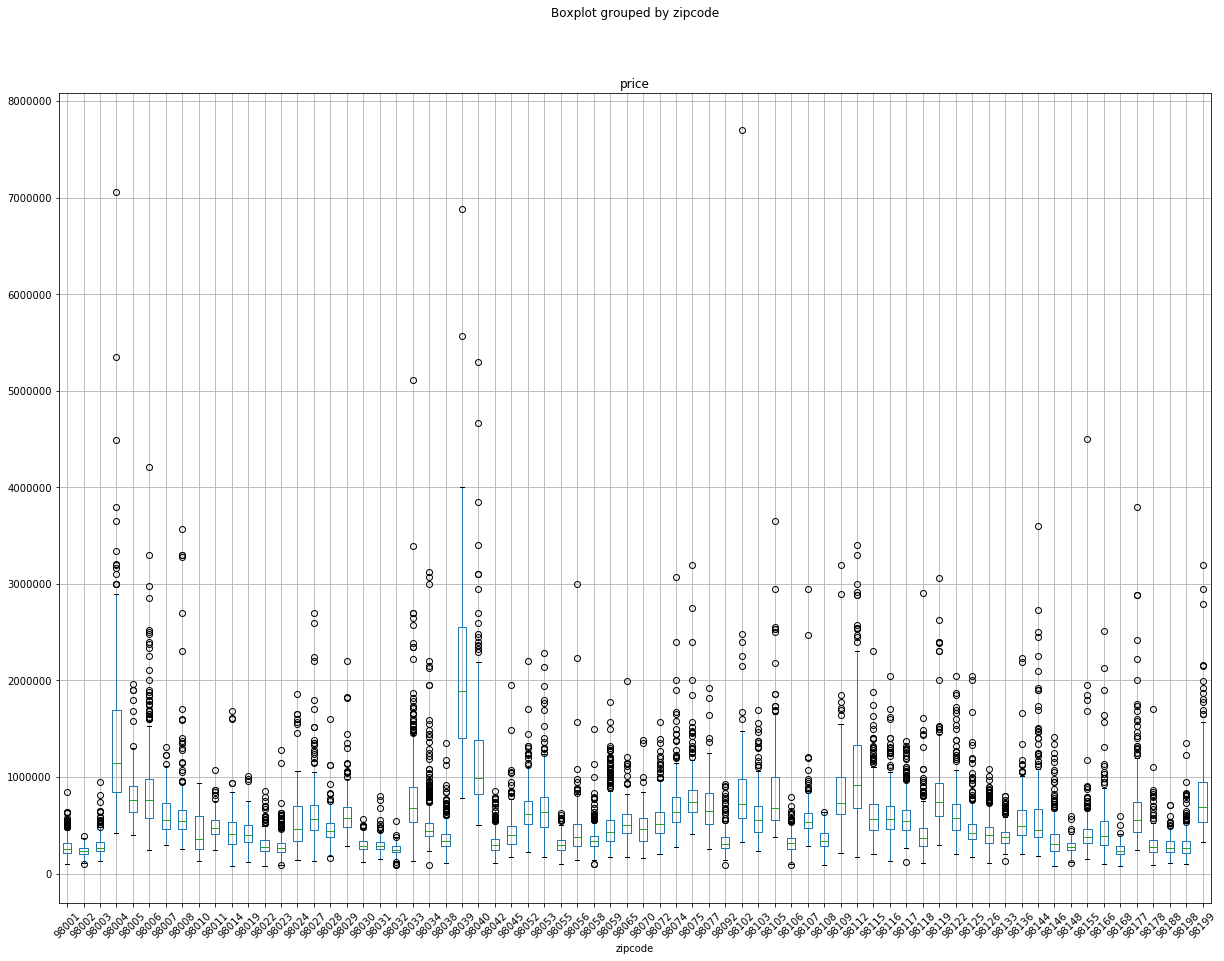

In [102]:
#data = sales[["zipcode","price"]].values
ax = sales.boxplot(column="price", by="zipcode", rot=45, figsize=(20, 15))

Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

# Build a regression model with more features

In [152]:
from sklearn.linear_model import LinearRegression
import numpy as np
my_features_model = LinearRegression()
my_features_model.fit(train_data[my_features].values,train_data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Build a regression model with advance features

In [153]:
from sklearn.linear_model import LinearRegression
import numpy as np
advanced_features_model = LinearRegression()
advanced_features_model.fit(train_data[advanced_features].values,train_data["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
print(my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [154]:
print(advanced_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [134]:
# Với mô hình linear regresstion phải tối thiếu có 2 dimentions trở lên
test_data[my_features].ndim

2

## Comparing the results of the simple model with adding more features

#### Root Mean Square Error(RMSE) for x = sqft_living

In [106]:
labels = test_data['price']

prediction = sqft_model.predict(np.reshape(test_data["sqft_living"].values, [-1, 1]))
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction)))

248879.06143647005


#### Root Mean Square Error(RMSE) for x1,x2,x2,x4,x5,x6 with my_features

In [107]:
prediction_features = my_features_model.predict(test_data[my_features].values)
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction_features)))

244004.77443104092


#### Root Mean Square Error(RMSE) for x1,x2,x2,x4,x5,x6 with advanced_features

In [156]:
prediction_advance = advanced_features_model.predict(test_data[advanced_features].values)
print(np.sqrt(sklearn.metrics.mean_squared_error(labels.values, prediction_advance)))

190473.37570966638


#### Question 3. Between the one trained with advanced_features and the model trained with my_features in RMSE. What is the difference? ?(Building a regression model with several more features)
= 244004.77443104092 - 190473.37570966638 = 53531.398721374

#### Mean Square Error(MSE)

In [135]:
print(sklearn.metrics.mean_squared_error(labels.values, prediction_features))

59538329945.14316


we can view the learned regression coefficients. Chúng ta có thể thấy với mỗi features sẽ là một biến tương đương với, trong bài này là 6 tương đương với 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode')

In [108]:
my_features_model.coef_

array([-5.66006330e+04,  1.10870936e+04,  3.20408369e+02, -2.89499140e-01,
       -2.41800491e+03,  6.17971071e+02])

we can view the learned regression intercept.

In [109]:
my_features_model.intercept_

-60558259.0181381

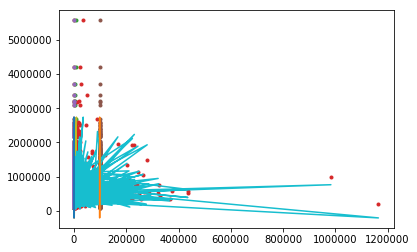

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_data[my_features],
         test_data['price'],'.',
         test_data[my_features],
         my_features_model.predict(test_data[my_features]),
         '-')

The RMSE goes down from \$248.879\$ to \$244,004\$ with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [111]:
house1 = sales[sales['zipcode']==98039]

In [112]:
sales1 = sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]

In [113]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000,4,3.50,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000,4,3.50,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4791,2210500019,20150324T000000,937500,3,1.00,1320,8500,1.0,0,0,...,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800
5178,6447300345,20150406T000000,1160000,4,3.00,2680,15438,2.0,0,2,...,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406
5589,6447300225,20141106T000000,1880000,3,2.75,2620,17919,1.0,0,1,...,9,2620,0,1949,0,98039,47.6144,-122.228,3400,14400
5880,2525049148,20141007T000000,3418800,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [114]:
print(house1['price'].mean(axis = 0))

2160606.6


#### Question 2. What part of the houses people can live in between 2000 sq.ft. and 4000 sq.ft.?(Filtering data)
9221/21613 = 4.2631

In [115]:
len(sales1['sqft_living'])

9221

In [116]:
len(sales['sqft_living'])

21613

In [143]:
len(sales1['sqft_living'])/len(sales['sqft_living'])

0.0

In [144]:
fraction_having_sqft_in_this_range = round(len(sales1['sqft_living'])/len(sales['sqft_living']),4)
print("result", fraction_having_sqft_in_this_range)

('result', 0.0)


In [118]:
print(my_features_model.predict(house1[my_features].values))

[1384843.10736139 1178118.09243258  254421.79147591  254421.79147591
 2120440.69150774 2740522.99811769  286352.32920416  683254.71535523
  719558.83034125 1534919.48302726  681756.52635602  608079.10238914
  738150.77685993 2928248.02630226  358507.96900482  612054.05025923
  946869.51667522 1300481.58748982  619687.0724642   321117.85412794
  996588.89227536 1261104.5727083   877024.05329502  853132.5098375
  696770.945676   1245130.94030382 1164413.39762525 1012002.00996201
  876099.96638316 1162701.8528327  1372930.38748734 1123192.99750817
  568547.18082173 1604711.01208086  515557.12398984 1217671.38036113
 1200381.31147681  756386.13246851  867549.69641165 1932291.49921482
  537427.25052292 1141062.03427178  857211.44954737  799595.48067813
 1558972.00346244 1104986.46296058 1131615.74355458  887617.28608844
 1442208.78247172 1049145.8889581 ]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [119]:
house2 = sales.loc[sales['id']==1925069082]

In [120]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [121]:
print(sqft_model.predict(np.reshape(house2["sqft_living"].values, [-1, 1])))

[1269357.04273158]


In [122]:
print(my_features_model.predict(house2[my_features].values))

[1274443.76531347]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [123]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [70]:
bill_gates=pandas.DataFrame.from_dict(bill_gates)
print(my_features_model.predict(bill_gates[my_features].values))

[15796988.23574059]


The model predicts a price of over $15M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)